In [1]:
from  pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("Analysing London crime data").getOrCreate()

In [28]:
spark

In [4]:
data = spark.read.format("csv").option("header", "true").load("/home/sudeep/sources/github/apache spark/spark getting started/02/demos/datasets/london_crime_by_lsoa.csv")


In [6]:
data.head()

Row(lsoa_code='E01001116', borough='Croydon', major_category='Burglary', minor_category='Burglary in Other Buildings', value='0', year='2016', month='11')

In [7]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [8]:
data.count()

13490604

In [9]:
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



In [10]:
data.dropna()

DataFrame[lsoa_code: string, borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [11]:
data.count()

13490604

In [12]:
data.drop("lsoa_code")

DataFrame[borough: string, major_category: string, minor_category: string, value: string, year: string, month: string]

In [13]:
total_boroughs = data.select("borough").distinct()

In [15]:
total_boroughs.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



In [16]:
hackney_data = data.filter(data['borough'] == 'Hackney')

In [17]:
hackney_data.show()

+---------+-------+--------------------+--------------------+-----+----+-----+
|lsoa_code|borough|      major_category|      minor_category|value|year|month|
+---------+-------+--------------------+--------------------+-----+----+-----+
|E01001786|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|E01001794|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|E01001787|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|E01001738|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|E01001807|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
|E01001733|Hackney|            Burglary|Burglary in a Dwe...|    2|2008|    5|
|E01001806|Hackney|             Robbery|   Business Property|    0|2016|    7|
|E01001734|Hackney|  Theft and Handling|Theft/Taking of P...|    0|2009|   12|
|E01001750|Hackney|               Drugs|    Drug Trafficking|    0|2014|    4|
|E01001828|Hackney|  Theft and Handling|Handling Sto

In [18]:
data_2105_16 =  data.filter(data['year'].isin(['2015', '2016']))

In [19]:
data_2105_16.show()

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01001116|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004177|              Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
|E01003076|             Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|E01002398|          Hillingdon|  Theft and Handling|Theft/Taking Of M...|    0|2016|    2|
|E01002945|Kingston upon Thames|  Theft and Handling|    Theft From Shops|    0|

In [20]:
data_2105_16.sample(0.1).show()

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01001646|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01003076|             Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|E01001972|            Haringey|Violence Against ...|        Wounding/GBH|    0|2015|   12|
|E01003989|           Southwark|  Theft and Handling|    Theft From Shops|    4|2016|    8|
|E01004346|      Waltham Forest|  Theft and Handling|Motor Vehicle Int...|    0|2016|    3|
|E01003484|              Newham|  Theft and Handling|Theft/Taking of P...|    0|2016|    3|
|E01001210|              Ealing|  Theft and Handling|Theft/Taking Of M...|    0|2016|    1|
|E01032774|       Tower Hamlets|  Theft and Handling|Handling Stolen G...|    0|

In [21]:
data_greater_2014 = data.filter(data['year'] >= 2014)

In [22]:
data_greater_2014.show()

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01001116|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004177|              Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
|E01003076|             Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|E01003852|Richmond upon Thames|             Robbery|   Personal Property|    0|2014|    1|
|E01002398|          Hillingdon|  Theft and Handling|Theft/Taking Of M...|    0|

# Grouping Aggregating

In [24]:
borough_Crime_count =  data.groupBy('borough').count()

In [25]:
borough_Crime_count.show()

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
|              Camden|378432|
|           Greenwich|421200|
|              Newham|471420|
|       Tower Hamlets|412128|
|            Hounslow|395928|
|              Barnet|572832|
|              Harrow|365688|
|Kensington and Ch...|296784|
|           Islington|359208|
|               Brent|490644|
|            Haringey|413856|
|             Bromley|523908|
|              Merton|339876|
|         Westminster|366660|
|             Hackney|417744|
+--------------------+------+
only showing top 20 rows



In [33]:
borough_covictions_sum = data.groupBy('borough').agg({'value':'sum'})

In [34]:
borough_covictions_sum.show()

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
|              Camden|  275147.0|
|           Greenwich|  181568.0|
|              Newham|  262024.0|
|       Tower Hamlets|  228613.0|
|            Hounslow|  186772.0|
|              Barnet|  212191.0|
|              Harrow|  116848.0|
|Kensington and Ch...|  171981.0|
|           Islington|  230286.0|
|               Brent|  227551.0|
|            Haringey|  213272.0|
|             Bromley|  184349.0|
|              Merton|  115654.0|
|         Westminster|  455028.0|
|             Hackney|  217119.0|
+--------------------+----------+
only showing top 20 rows



In [39]:
borough_covictions_sum_convictions = data.groupBy('borough').agg({'value':'sum'}).withColumnRenamed("sum(value)","convictions")

In [40]:
borough_covictions_sum_convictions.show()

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
|              Camden|   275147.0|
|           Greenwich|   181568.0|
|              Newham|   262024.0|
|       Tower Hamlets|   228613.0|
|            Hounslow|   186772.0|
|              Barnet|   212191.0|
|              Harrow|   116848.0|
|Kensington and Ch...|   171981.0|
|           Islington|   230286.0|
|               Brent|   227551.0|
|            Haringey|   213272.0|
|             Bromley|   184349.0|
|              Merton|   115654.0|
|         Westminster|   455028.0|
|             Hackney|   217119.0|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
borough_covictions_sum_convictions

In [41]:
total_borough_convictions = borough_covictions_sum_convictions.agg({'convictions':'sum'})

In [50]:
total_borough_convictions.show()
total_convictions = total_borough_convictions.collect()[0][0]

+----------------+
|sum(convictions)|
+----------------+
|       6447758.0|
+----------------+



In [43]:
import pyspark.sql.functions as func

In [52]:
borough_percentage_contribution = borough_covictions_sum_convictions.withColumn("% contribution", func.round(borough_covictions_sum_convictions.convictions /total_convictions * 100 , 2))

In [54]:
borough_percentage_contribution.show()

+--------------------+-----------+--------------+
|             borough|convictions|% contribution|
+--------------------+-----------+--------------+
|             Croydon|   260294.0|          4.04|
|          Wandsworth|   204741.0|          3.18|
|              Bexley|   114136.0|          1.77|
|             Lambeth|   292178.0|          4.53|
|Barking and Dagenham|   149447.0|          2.32|
|              Camden|   275147.0|          4.27|
|           Greenwich|   181568.0|          2.82|
|              Newham|   262024.0|          4.06|
|       Tower Hamlets|   228613.0|          3.55|
|            Hounslow|   186772.0|           2.9|
|              Barnet|   212191.0|          3.29|
|              Harrow|   116848.0|          1.81|
|Kensington and Ch...|   171981.0|          2.67|
|           Islington|   230286.0|          3.57|
|               Brent|   227551.0|          3.53|
|            Haringey|   213272.0|          3.31|
|             Bromley|   184349.0|          2.86|


In [55]:
borough_percentage_contribution.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- % contribution: double (nullable = true)



In [56]:
borough_percentage_contribution.orderBy(borough_percentage_contribution[2].desc()).show(10)

+-------------+-----------+--------------+
|      borough|convictions|% contribution|
+-------------+-----------+--------------+
|  Westminster|   455028.0|          7.06|
|      Lambeth|   292178.0|          4.53|
|    Southwark|   278809.0|          4.32|
|       Camden|   275147.0|          4.27|
|       Newham|   262024.0|          4.06|
|      Croydon|   260294.0|          4.04|
|       Ealing|   251562.0|           3.9|
|    Islington|   230286.0|          3.57|
|Tower Hamlets|   228613.0|          3.55|
|        Brent|   227551.0|          3.53|
+-------------+-----------+--------------+
only showing top 10 rows



In [58]:
conviction_monthly = data.filter(data['year'] == 2014).groupBy('month').agg({'value':'sum'}).withColumnRenamed("sum(value)", "convictions")

In [59]:
conviction_monthly.show()

+-----+-----------+
|month|convictions|
+-----+-----------+
|    7|    58564.0|
|   11|    59704.0|
|    3|    57669.0|
|    8|    55641.0|
|    5|    56327.0|
|    6|    57039.0|
|    9|    56933.0|
|    1|    55515.0|
|   10|    60537.0|
|    4|    53467.0|
|   12|    57565.0|
|    2|    51222.0|
+-----+-----------+



In [60]:
totol_conviction_monthly = conviction_monthly.agg({'convictions':'sum'}).collect()[0][0]

In [62]:
totol_conviction_monthly

680183.0

In [63]:
totol_conviction_monthly = conviction_monthly.withColumn("percent", func.round(conviction_monthly.convictions/totol_conviction_monthly * 100 * 2))

In [64]:
totol_conviction_monthly.columns

['month', 'convictions', 'percent']

In [65]:
totol_conviction_monthly.show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|    7|    58564.0|   17.0|
|   11|    59704.0|   18.0|
|    3|    57669.0|   17.0|
|    8|    55641.0|   16.0|
|    5|    56327.0|   17.0|
|    6|    57039.0|   17.0|
|    9|    56933.0|   17.0|
|    1|    55515.0|   16.0|
|   10|    60537.0|   18.0|
|    4|    53467.0|   16.0|
|   12|    57565.0|   17.0|
|    2|    51222.0|   15.0|
+-----+-----------+-------+



In [67]:
totol_conviction_monthly.orderBy(totol_conviction_monthly.percent.desc()).show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|   11|    59704.0|   18.0|
|   10|    60537.0|   18.0|
|    7|    58564.0|   17.0|
|    6|    57039.0|   17.0|
|    3|    57669.0|   17.0|
|    9|    56933.0|   17.0|
|    5|    56327.0|   17.0|
|   12|    57565.0|   17.0|
|    8|    55641.0|   16.0|
|    1|    55515.0|   16.0|
|    4|    53467.0|   16.0|
|    2|    51222.0|   15.0|
+-----+-----------+-------+



In [77]:
crime_category = data.groupBy('major_category').agg({'value':'sum'}).withColumnRenamed("sum(value)","convictions")

In [80]:
crime_category.orderBy(crime_category.convictions.desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|  2661861.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|     Criminal Damage|   630938.0|
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|Other Notifiable ...|   106349.0|
|    Fraud or Forgery|     5325.0|
|     Sexual Offences|     1273.0|
+--------------------+-----------+



In [82]:
year_df = data.select('year')

In [83]:
year_df.agg({'year':'min'}).show()

+---------+
|min(year)|
+---------+
|     2008|
+---------+



In [86]:
year_df.agg({'year':'max'}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [87]:
year_df.describe().show()

+-------+-----------------+
|summary|             year|
+-------+-----------------+
|  count|         13490604|
|   mean|           2012.0|
| stddev|2.581988993167432|
|    min|             2008|
|    max|             2016|
+-------+-----------------+



In [91]:
data.crosstab('borough','major_category').select('borough_major_category', 'Burglary',"Drugs", "Fraud or Forgery", 'Robbery').show()

+----------------------+--------+-----+----------------+-------+
|borough_major_category|Burglary|Drugs|Fraud or Forgery|Robbery|
+----------------------+--------+-----+----------------+-------+
|              Havering|   32400|32616|            5508|  27648|
|                Merton|   26784|29160|            5724|  23652|
|              Haringey|   31320|35424|           10368|  29484|
|         Tower Hamlets|   31104|37368|            5400|  28512|
|               Bromley|   42552|42336|            8532|  34668|
|               Enfield|   39528|44064|            9720|  35532|
|  Kingston upon Thames|   21168|22140|            3780|  15660|
|           Westminster|   27648|32616|            8748|  25056|
|  Richmond upon Thames|   24840|23004|            2808|  18468|
|              Lewisham|   36504|43740|           11016|  34884|
|                 Brent|   37368|46980|            9288|  34128|
|  Barking and Dagenham|   23760|26244|            7236|  22248|
|             Redbridge| 

In [92]:
get_ipython().magic('matplotlib inline')

In [93]:
import matplotlib.pyplot as plt

In [94]:
plt.style.use('ggplot')

In [95]:
def describle(year):
    yearly_details = data.filter(data.year == year).groupby('borough').agg({'value':'sum'}).withColumnRenamed("sum(value)","convictions")
    borough_list = [x[0] for x in  yearly_details.toLocalIterator()]
    convictions_list = [x[1] for x in yearly_details.toLocalIterator()]
    
    plt.figure(figsize=(33,10))
    plt.bar(borough_list,convictions_list)
    plt.title("Crime for the year: " + year, fontsize=30 )
    plt.xlabel("Borough", fontsize=30)
    plt.ylabel('Convictions', fontsize=30)
    
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()
    

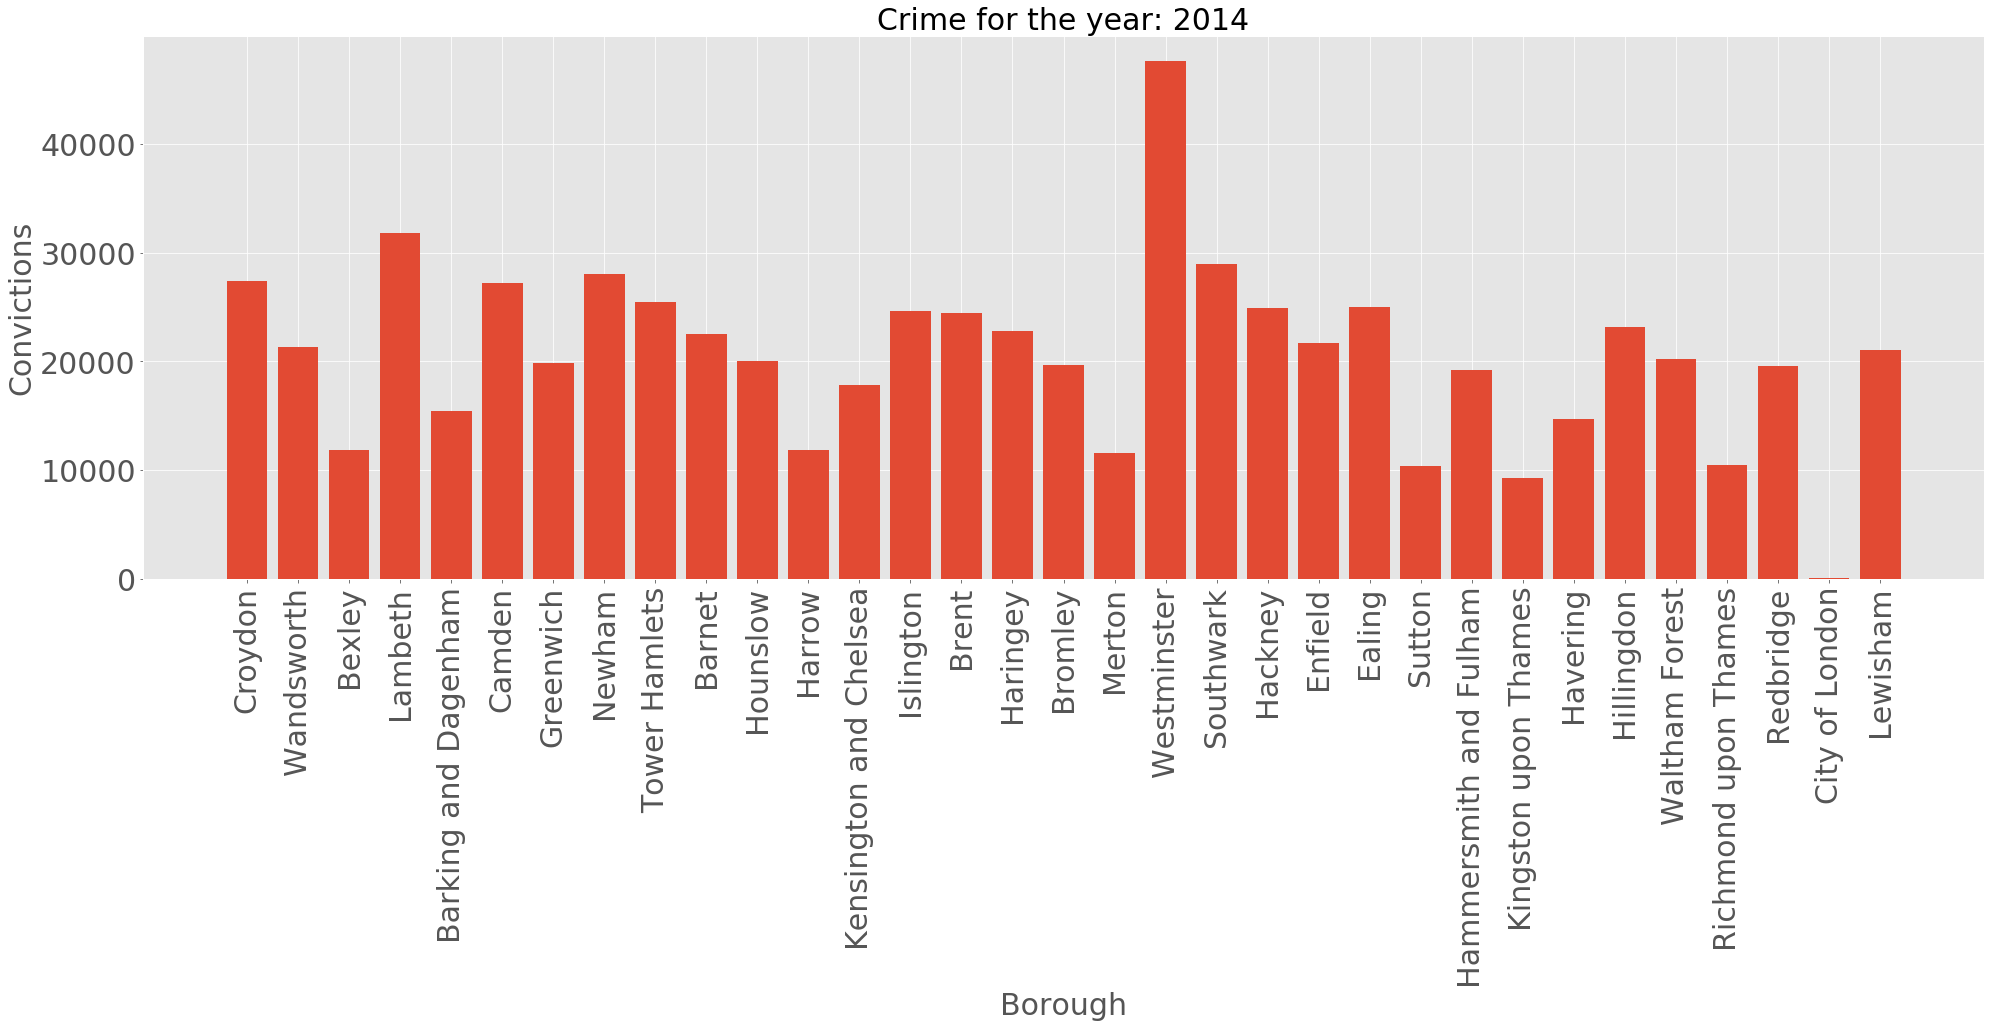

In [97]:
describle('2014')